# DS 300: Data Mining - Lab 5: Artificial Neural Networks

In the past, you have been working with the Home Value Prediction data. In this lab, we’ve reduced the number of input features and changed the task into predicting whether the house price is above or below median value. You will create your own neural network to perform the prediction task. 

Since this dataset is familiar to us and much simplied, some questions in this lab will be open-ended just like you will see in the real-life interview. 

You have some major goals here: 

+ Question 1 (25 Points): Load the dataset and perform data preprocessing. 
+ Question 2 (25 Points): Perform exploratory data analysis and render some insights. 
+ Question 3 (25 Points): Build an ANN model with Keras and try to get the prediction accuracy over 85%.
+ Question 4 (25 Points): Plot the model accuracy and model loss in two graphs with tranining and validation over epochs. 

Something you may want to consider:

1. Try different scalers in the data preprocessing. E.g., MinMaxScaler() vs StandardScaler()
2. Try to split your dataset into the following percentage: 1) Training set (70%); 2) Test set (15%); 3) Validation set (15%). The validation set can be used in the `tranining` step in ANN modeling. You may want to run `train_test_split` twice to achieve this goal.

Dataset can be found at: [url](https://raw.githubusercontent.com/BlueJayADAL/DS300/master/datasets/lab7_house.csv).


## Question 1

#### Import all the necessary libraries

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline






#### Load the dataset from [url](https://raw.githubusercontent.com/BlueJayADAL/DS300/master/datasets/lab7_house.csv) into a DataFrame named as `df`.

In [2]:
# Importing the dataset
url = 'https://raw.githubusercontent.com/BlueJayADAL/DS300/master/datasets/lab7_house.csv'
df = pd.read_csv(url)




In [3]:
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


Now, we split the dataset into our input features and the label we wish to predict.

In [4]:
X =  df.drop('AboveMedianPrice',axis=1)


y = df['AboveMedianPrice']



Normalizing our data is very important, as we want the input features to be on the same order of magnitude to make our training easier. We'll use a min-max scaler from scikit-learn which scales our data to be between 0 and 1.

In [5]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [6]:
min_max_scaler = preprocessing.MinMaxScaler()


X_scale = min_max_scaler.fit_transform(X)



In [7]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

Lastly, we wish to set aside some parts of our dataset for a validation set and a test set. We use the function train_test_split from scikit-learn to do that.

In [8]:
from sklearn.model_selection import train_test_split


In [9]:
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X_scale, y, test_size=0.3, random_state=101)



In [10]:
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5, random_state=101)



In [11]:
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


## Question 2: EDA

Use your own knowledge to achieve this. Render some interesting results!

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [13]:
df.isnull().sum()


LotArea             0
OverallQual         0
OverallCond         0
TotalBsmtSF         0
FullBath            0
HalfBath            0
BedroomAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageArea          0
AboveMedianPrice    0
dtype: int64

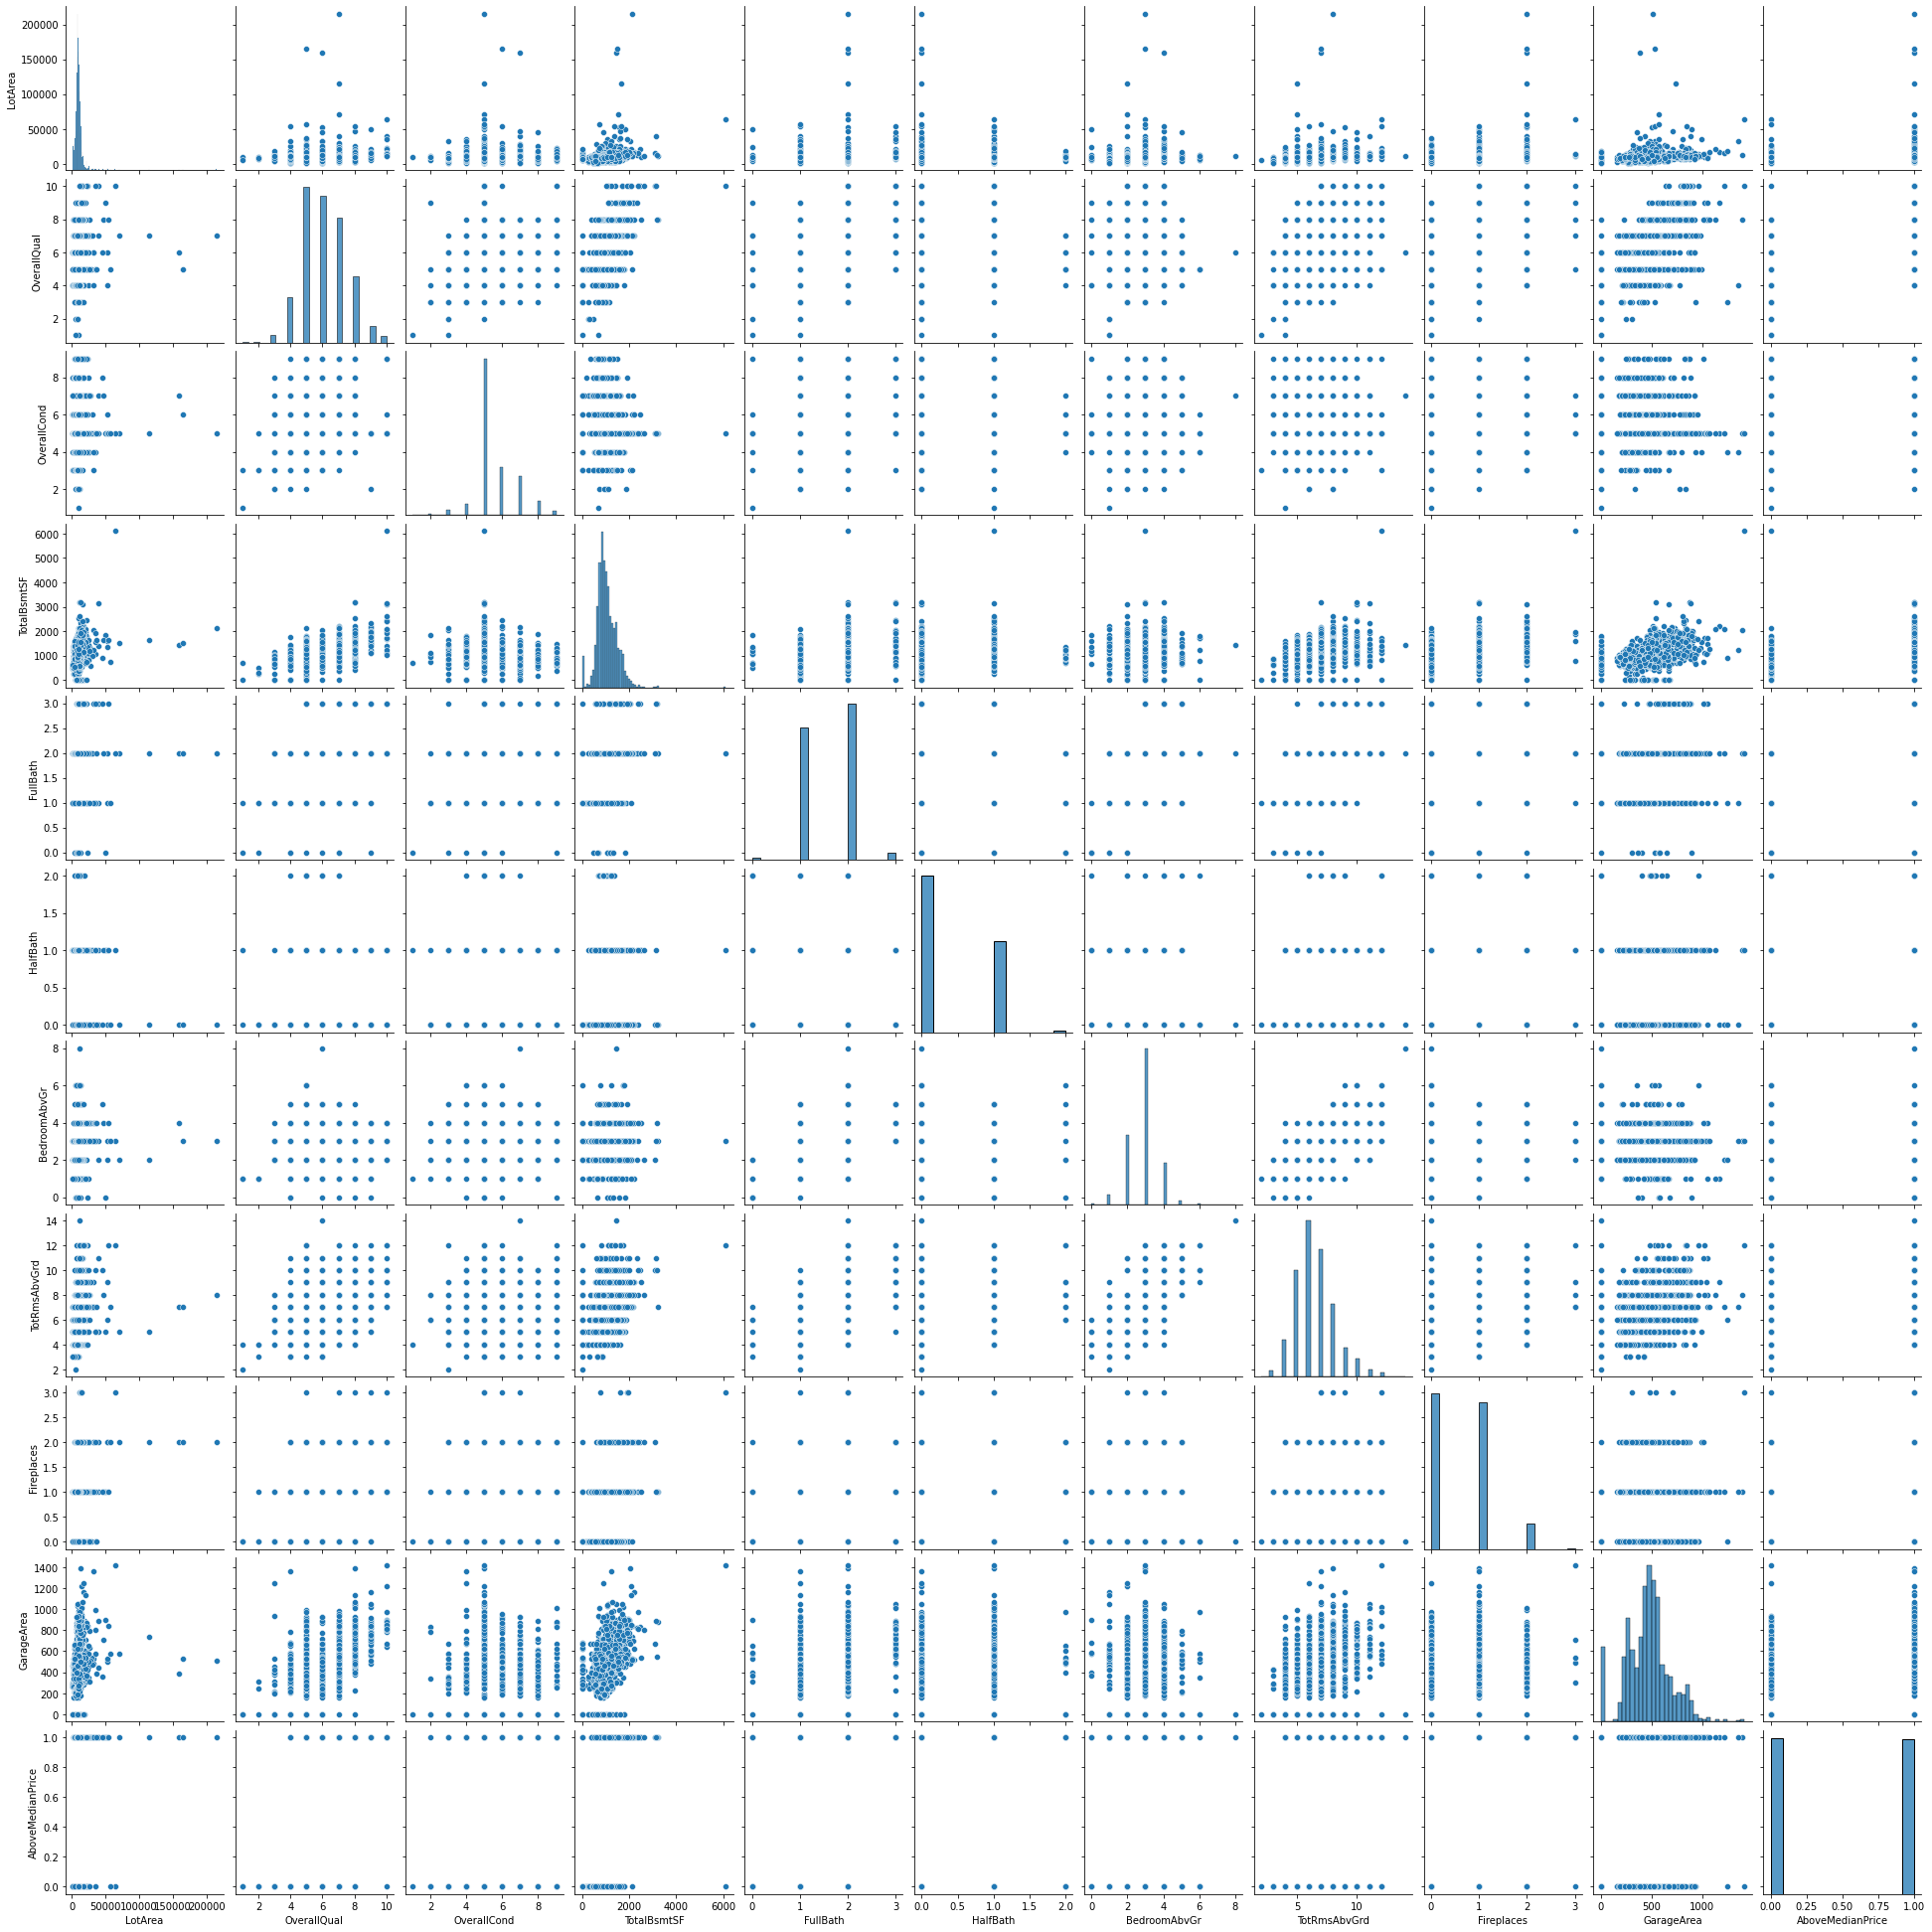

In [123]:
sns.pairplot(df)

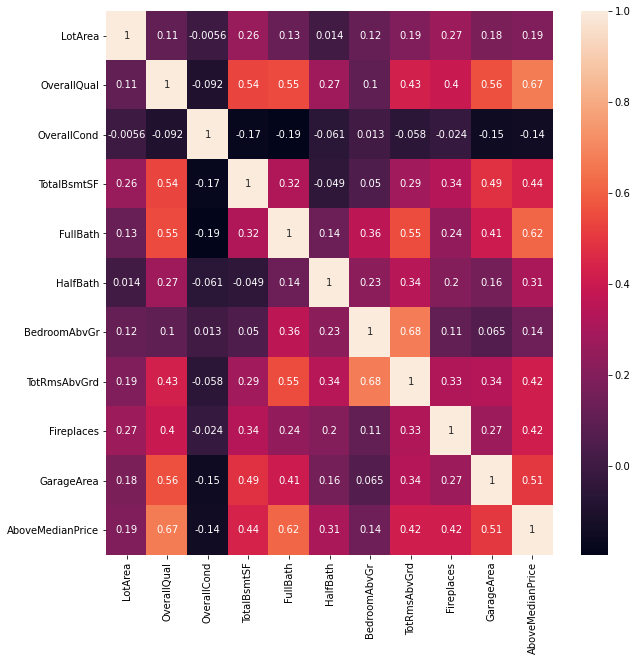

In [107]:
plt.figure(figsize=(10, 10))

sns.heatmap(df.corr(), annot = True)

## Question 3: Building and Training Our First Neural Network

We will be using Keras to build our architecture. Let's import the code from Keras that we will need to use:

In [19]:
pip install keras


     |████████████████████████████████| 1.3 MB 2.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install tensorflow

     |████████████████████████████████| 207.1 MB 143 kB/s  eta 0:00:01
     |████████████████████████████████| 4.0 MB 7.8 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 4.5 MB/s  eta 0:00:01
     |████████████████████████████████| 12.2 MB 9.9 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 9.6 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 12.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 22.3 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 14.9 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 17.4 MB/s eta 0:00:01
     |████████████████████████████████| 463 kB 19.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 15.9 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 16.8 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 19.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 12.5 MB/s eta 0:00:01
     |████████████████████████████████

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

We will be using the Sequential model, which means that we merely need to describe the layers above in sequence. Our neural network has three layers:

- Hidden layer 1: 32 neurons, ReLU activation
- Hidden layer 2: 32 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation

In [109]:
model  = Sequential()






Now that we've got our architecture specified, we need to find the best numbers for it. Before we start our training, we have to configure the model by
- Telling it what algorithm you want to use to do the optimization (we'll use stochastic gradient descent)
- Telling it what loss function to use (for binary classification, we will use binary cross entropy)
- Telling it what other metrics you want to track apart from the loss function (we want to track accuracy as well)

We do so below:

In [110]:
model.add(Dense(units=32,
                     activation='relu',
                     input_dim=10                  
))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='sgd',loss='binary_crossentropy',
                   metrics=['accuracy'])





In [118]:
model.fit(X_train,y_train,batch_size=10,validation_data=(X_val,y_val), epochs=100)
y_pred = model.predict(X_test)


y_pred[:10]

Epoch 1/100
103/103 [==============================] - 0s 3ms/step - loss: 0.2236 - accuracy: 0.9022 - val_loss: 0.3005 - val_accuracy: 0.8995
Epoch 2/100
103/103 [==============================] - 0s 3ms/step - loss: 0.2242 - accuracy: 0.9012 - val_loss: 0.2996 - val_accuracy: 0.8995
Epoch 3/100
103/103 [==============================] - 0s 3ms/step - loss: 0.2271 - accuracy: 0.9012 - val_loss: 0.2909 - val_accuracy: 0.8950
Epoch 4/100
103/103 [==============================] - 0s 3ms/step - loss: 0.2256 - accuracy: 0.8973 - val_loss: 0.2913 - val_accuracy: 0.8950
Epoch 5/100
103/103 [==============================] - 0s 3ms/step - loss: 0.2250 - accuracy: 0.8992 - val_loss: 0.2985 - val_accuracy: 0.8950
Epoch 6/100
103/103 [==============================] - 0s 3ms/step - loss: 0.2246 - accuracy: 0.9041 - val_loss: 0.3113 - val_accuracy: 0.8995
Epoch 7/100
103/103 [==============================] - 0s 3ms/step - loss: 0.2240 - accuracy: 0.9051 - val_loss: 0.2924 - val_accuracy: 0.8950

array([[0.02407221],
       [0.9869463 ],
       [0.997398  ],
       [0.66090554],
       [0.20057687],
       [0.99706334],
       [0.96089375],
       [0.22820497],
       [0.9984792 ],
       [0.45870906]], dtype=float32)

In [112]:
y_pred = (y_pred > 0.5)*1.0


In [113]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score


print('Confusion Matris: \n', confusion_matrix(y_test,y_pred))
print('Accuracy: \n', accuracy_score(y_test,y_pred))

Confusion Matris: 
 [[ 92  12]
 [ 14 101]]
Accuracy: 
 0.8812785388127854


Training on the data is pretty straightforward and requires us to write one line of code. The function is called 'fit' as we are fitting the parameters to the data. We specify:
- what data we are training on, which is X_train and Y_train
- the size of our mini-batch, we use 32
- how long we want to train it for (epochs), we use 100
- what our validation data is so that the model will tell us how we are doing on the validation data at each point.

This function will output a history, which we save under the variable hist. We'll use this variable a little later.

In [114]:
hist =model.fit(X_train,y_train,
                     validation_data=(X_val,y_val),
                     epochs=100,
                     batch_size=32)







Epoch 1/100
32/32 [==============================] - 0s 6ms/step - loss: 0.2274 - accuracy: 0.8973 - val_loss: 0.2859 - val_accuracy: 0.9041
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2273 - accuracy: 0.9012 - val_loss: 0.2871 - val_accuracy: 0.9041
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2272 - accuracy: 0.8992 - val_loss: 0.2844 - val_accuracy: 0.8995
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2274 - accuracy: 0.8953 - val_loss: 0.2843 - val_accuracy: 0.8995
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2265 - accuracy: 0.9022 - val_loss: 0.2889 - val_accuracy: 0.8950
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2270 - accuracy: 0.8992 - val_loss: 0.2838 - val_accuracy: 0.8995
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2270 - accuracy: 0.9002 - val_loss: 0.2870 - val_accuracy: 0.9041
Epoch 8/100
3

Evaluating our data on the test set:

## Question 4: Visualizing Loss and Accuracy

Import the relevant package we need to do the visualization

In [115]:
import matplotlib.pyplot as plt

We want to visualize the training loss and the validation loss like this:

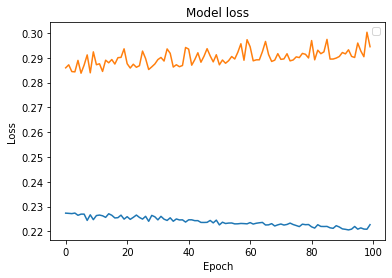

In [120]:
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])




plt.show()

We can also visualize the training accuracy and the validation accuracy like this:

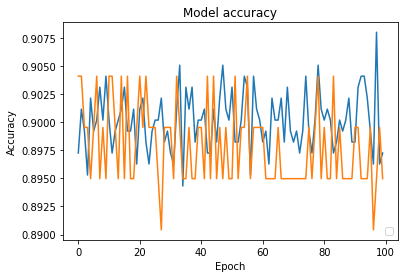

In [121]:
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')


plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])






plt.show()